# Proyek Analisis Data: Air Quality
- **Nama:** Timoty Joel Jeremy


## Menentukan Pertanyaan Bisnis



- Pertanyaan 1 : Bagaimana Perubahan Kualitas Udara pada Masing-Masing *Station*?
- Pertanyaan 2 : Bagaimana Persentase Udara dalam tiap *Station*


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive');

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Meload dataset dari file csv untuk dilihat isinya menggunakan library pandas.

In [3]:
import os

In [4]:
df_path = '/content/drive/MyDrive/dataset/air_quality/'

# Dictionary to store DataFrames
dataframes = {}

# Load CSV files into DataFrames
for files in os.listdir(df_path):
    df_name = os.path.splitext(files)[0].split("_")[2]  # Use file name without extension as DataFrame name
    dataframes[df_name] = pd.read_csv(os.path.join(df_path, files)).drop(['No'], axis = 1)

In [5]:
dataframes['Wanliu'].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [6]:
dataframes['Wanliu'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34682 non-null  float64
 5   PM10     34780 non-null  float64
 6   SO2      34489 non-null  float64
 7   NO2      33994 non-null  float64
 8   CO       33252 non-null  float64
 9   O3       32957 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34941 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


In [7]:
dataframes['Shunyi'].head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


### Assessing Data

In [8]:
for df_name, df in dataframes.items():
  print(df_name, ' | ', df)

Aotizhongxin  |         year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0      2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1      2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2      2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3      2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4      2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
...     ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   ...   
35059  2017      2   28    19   12.0  29.0   5.0  35.0  400.0  95.0  12.5   
35060  2017      2   28    20   13.0  37.0   7.0  45.0  500.0  81.0  11.6   
35061  2017      2   28    21   16.0  37.0  10.0  66.0  700.0  58.0  10.8   
35062  2017      2   28    22   21.0  44.0  12.0  87.0  700.0  35.0  10.5   
35063  2017      2   28    23   19.0  31.0  10.0  79.0  600.0  42.0   8.6   

         PRES  DEWP  RAIN   wd  WSPM       station  
0    

In [9]:
# Create a function to combine date and time columns
def combine_datetime(dataframes):
    dataframes['datetime'] = pd.to_datetime(dataframes[['year', 'month', 'day', 'hour']])
    dataframes.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)
    return dataframes

# Iterate through DataFrames and apply the combine_datetime function
for df_name, df in dataframes.items():
    dataframes[df_name] = combine_datetime(df)

In [10]:
# Looking for the sum of missing values in dataframe
dataframes['Shunyi'].isna().sum()

PM2.5        913
PM10         548
SO2         1296
NO2         1365
CO          2178
O3          1489
TEMP          51
PRES          51
DEWP          54
RAIN          51
wd           483
WSPM          44
station        0
datetime       0
dtype: int64

In [11]:
# Check missing values
missing_df = {}

for df_name, df in dataframes.items():
  missing_df[df_name] = df.isna().sum()

pd.DataFrame(missing_df).transpose() # We turn it into dataframe and make it transpose so it will be looked better

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,925,718,935,1023,1776,1719,20,20,20,20,81,14,0,0
Changping,774,582,628,667,1521,604,53,50,53,51,140,43,0,0
Dingling,779,656,730,1234,2012,1214,53,50,53,51,140,43,0,0
Dongsi,750,553,663,1601,3197,664,20,20,20,20,78,14,0,0
Guanyuan,616,429,474,659,1753,1173,20,20,20,20,81,14,0,0
Gucheng,646,381,507,668,1401,729,51,50,51,43,159,42,0,0
Huairou,953,777,980,1639,1422,1151,51,53,53,55,302,49,0,0
Nongzhanguan,628,440,446,692,1206,506,20,20,20,20,78,14,0,0
Shunyi,913,548,1296,1365,2178,1489,51,51,54,51,483,44,0,0
Tiantan,677,597,1118,744,1126,843,20,20,20,20,78,14,0,0


In [12]:
# Create a function that will check the duplicate of data
duplicated_df = {}

for df_name, df in dataframes.items():
  duplicated_df[df_name] = df.duplicated().sum()

pd.DataFrame.from_dict(duplicated_df, orient = 'index', columns = ['Duplicated DF'])

,Duplicated DF
Aotizhongxin,0
Changping,0
Dingling,0
Dongsi,0
Guanyuan,0
Gucheng,0
Huairou,0
Nongzhanguan,0
Shunyi,0
Tiantan,0


In [13]:
# Checking all dataset dtypes
dtypes_df = {}

for df_name, df in dataframes.items():
  dtypes_df[df_name] = df.dtypes

pd.DataFrame(dtypes_df).transpose()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
Aotizhongxin,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Changping,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dingling,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Dongsi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Guanyuan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Gucheng,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Huairou,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Nongzhanguan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Shunyi,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]
Tiantan,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,object,datetime64[ns]


### Cleaning Data

Karena ada 12 kota, maka akan lebih efektif menggunakan sebuah fungsi dengan for loop untuk melakukan cleaning data pada dataframe.

In [14]:
# Handle the missing values with mean
# For now we're using median, we can also use mean

median_df = {}

for df_name, df in dataframes.items():
  column_numeric = df.select_dtypes(include = ['number']).columns.difference(['No'])
  median_df[df_name] = df[column_numeric].mean()

for df_name, df in dataframes.items():
  column_numeric = df.select_dtypes(include = ['number']).columns.difference(['No'])
  df[column_numeric] = df[column_numeric].fillna(median_df[df_name])


Pada missing value, metode yang digunakan adalah dengan menggunakan mean atau rata-rata.

In [15]:
dataframes['Shunyi'].isna().sum()

PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd          483
WSPM          0
station       0
datetime      0
dtype: int64

Karena masih ada missing value pada kolom 'wd', maka akan diisi nilai kosongnya.

In [16]:
for df_name, df in dataframes.items():
  df['wd'].fillna(method = 'ffill', inplace = True)

In [17]:
dataframes['Shunyi'].isna().sum()

PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

In [19]:
# Concatenate all DataFrames into one DataFrame along the rows
concated_df = pd.concat(list(dataframes.values()), axis=0)

# Reset the index of the combined DataFrame
concated_df.reset_index(drop=True, inplace=True)

## Exploratory Data Analysis (EDA)

Tahap EDA ini saya gunakan untuk melihat lihat fitur atau kolom dari dataset. Pada awalnya saya menggunakan method describe untuk melihat statistik dari dataset.

In [20]:
concated_df.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,79.780235,104.578547,15.820683,50.583319,1230.62509,57.349235,13.538931,1010.746341,2.490654,0.064475,1.729701
std,79.984694,91.075152,21.420157,34.677400,1131.69545,55.767436,11.430737,10.469404,13.787251,0.820624,1.245924
min,2.000000,2.000000,0.285600,1.026500,100.00000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,21.000000,36.000000,3.000000,24.000000,500.00000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,57.000000,83.739723,8.000000,44.000000,900.00000,47.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,109.000000,144.000000,19.000000,70.000000,1500.00000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,999.000000,999.000000,500.000000,290.000000,10000.00000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [21]:
concated_df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [22]:
print(type(concated_df))

<class 'pandas.core.frame.DataFrame'>


Dibawah ini saya memberikan kolom baru yaitu kategori dari kualitas udara karena dari variabel bebas yaitu CO, NO2, SO2, PM2.5 dan PM10 menentukan suatu variabel dependen yaitu kualitas dari udara.

In [23]:
pm25_range = [12, 35.4, 55.4, 150.4, 250.4, float('inf')]
pm10_range = [54, 124, 254, 354, 424, float('inf')]
so2_range = [35, 75, 185, 304, 604, float('inf')]
no2_range = [53, 100, 360, 649, 1249, float('inf')]
co_range = [4400, 9400, 12400, 15400, 30400, float('inf')]
o3_range = [54, 70, 85, 105, 200, float('inf')]

air_quality_index = ['Good', 'Moderate', 'Unhealthy for Sensitive Group', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

def factor_category(factor_values, factor_range):
  #print(factor_values)
  for range in factor_range:
    #print(range)
    if factor_values <= range:
      return factor_range.index(range)

concated_df['Category'] = concated_df.apply(lambda row: air_quality_index[max(
    factor_category(row['PM2.5'], pm25_range),
    factor_category(row['PM10'], pm10_range),
    factor_category(row['SO2'], so2_range),
    factor_category(row['NO2'], no2_range),
    factor_category(row['CO'], co_range),
    factor_category(row['O3'], o3_range),
)], axis=1)

In [24]:
concated_df.sample(10)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
381375,5.0,18.0,2.0,22.0000,300.000000,79.0000,26.0,990.4,10.6,0.0,ENE,1.5,Wanliu,2016-09-01 15:00:00,Unhealthy for Sensitive Group
186261,108.0,245.0,25.0,64.0000,1200.000000,192.0000,27.8,1000.4,13.3,0.0,ENE,0.5,Gucheng,2014-05-30 21:00:00,Very Unhealthy
390891,43.0,77.0,8.0,79.0000,900.000000,1.0000,13.1,1011.4,6.9,0.0,NE,2.0,Wanshouxigong,2013-10-03 03:00:00,Unhealthy for Sensitive Group
57015,3.0,5.0,2.0,9.0000,100.000000,58.0000,26.1,1003.9,16.6,0.0,N,1.7,Changping,2015-09-01 15:00:00,Moderate
357090,77.0,147.0,18.0,46.3978,1319.353513,6.8544,4.5,1007.3,-8.3,0.0,NW,0.9,Wanliu,2013-11-24 18:00:00,Unhealthy
36567,75.0,101.0,27.0,27.0000,800.000000,183.0000,23.7,999.8,3.0,0.0,ESE,3.0,Changping,2013-05-02 15:00:00,Very Unhealthy
216405,4.0,34.0,2.0,8.0000,300.000000,66.1878,9.7,1012.4,-8.0,0.0,WNW,0.7,Huairou,2013-11-06 21:00:00,Moderate
416792,170.0,170.0,2.0,57.0000,1400.000000,27.0000,22.5,1009.1,20.4,0.0,ENE,1.2,Wanshouxigong,2016-09-16 08:00:00,Very Unhealthy
88031,304.0,304.0,6.0,62.0000,2100.000000,10.0000,8.2,1005.9,4.0,0.0,NNW,1.2,Dingling,2015-03-16 23:00:00,Hazardous
258281,18.0,37.0,3.0,16.0000,500.000000,206.0000,29.0,1005.5,15.5,0.0,ESE,2.0,Nongzhanguan,2014-08-17 17:00:00,Hazardous


In [26]:
concated_df[["station", "PM2.5"]].groupby(by="station").describe()

PM2.5                                                     
                 count       mean        std  min   25%   50%    75%    max
station                                                                    
Aotizhongxin   35064.0  82.773611  81.045038  3.0  23.0  61.0  112.0  898.0
Changping      35064.0  71.099743  71.524179  2.0  18.0  48.0   98.0  882.0
Dingling       35064.0  65.989497  71.460423  3.0  14.0  42.0   91.0  881.0
Dongsi         35064.0  86.194297  85.644198  3.0  23.0  63.0  117.0  737.0
Guanyuan       35064.0  82.933372  80.219412  2.0  24.0  61.0  113.0  680.0
Gucheng        35064.0  83.852089  82.030179  2.0  25.0  61.0  114.0  770.0
Huairou        35064.0  69.626367  70.250314  2.0  18.0  48.0   96.0  762.0
Nongzhanguan   35064.0  84.838483  85.449681  2.0  23.0  60.0  114.0  844.0
Shunyi         35064.0  79.491602  80.167173  2.0  20.0  57.0  109.0  941.0
Tiantan        35064.0  82.164911  80.136357  3.0  23.0  60.0  112.0  821.0
Wanliu         35064.0  83.374716  81.458179  2.0  24.0  60.0  115.0  957.0
Wanshouxigong  35064.0  85.024136  85.118393  3.0  23.0  62.0  115.0  999.0

In [27]:
# Make a back up dataframe for encoding with custom values
concated_df_copy = concated_df.copy()

Kemudian saya mengkonversi value dari kolom kategori pada dataframe copy menjadi tingkat polusi 1 sampai dengan 6

In [28]:
concated_df_copy['Category'] = concated_df_copy['Category'].replace({'Good': 1, 'Moderate': 2, 'Unhealthy for Sensitive Group': 3, 'Unhealthy': 4, 'Very Unhealthy': 5, 'Hazardous': 6})



In [29]:
concated_df_copy.sample(10)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime,Category
260987,17.0,44.0,15.000000,56.0,800.0,29.000000,1.0,1028.0,-14.3,0.0,NE,1.2,Nongzhanguan,2014-12-08 11:00:00,2
332224,254.0,271.0,88.000000,177.0,3800.0,13.000000,5.0,1010.0,-11.6,0.0,ESE,0.9,Tiantan,2015-01-23 16:00:00,6
76994,34.0,46.0,20.000000,47.0,800.0,6.000000,-2.2,1007.6,-15.3,0.0,E,0.7,Dingling,2013-12-12 02:00:00,2
380872,97.0,107.0,2.000000,32.0,1200.0,149.000000,32.3,999.6,25.6,0.0,SW,2.2,Wanliu,2016-08-11 16:00:00,5
13236,12.0,19.0,17.375901,27.0,600.0,56.353358,29.3,1003.4,11.4,0.0,WSW,1.1,Aotizhongxin,2014-09-03 12:00:00,2
235863,24.0,45.0,4.000000,10.0,100.0,47.000000,1.5,1017.3,-21.0,0.0,SE,2.1,Huairou,2016-01-26 15:00:00,2
380387,104.0,104.0,2.000000,46.0,1200.0,75.000000,29.1,995.7,23.3,0.0,NE,0.8,Wanliu,2016-07-22 11:00:00,4
106913,23.0,108.0,3.000000,9.0,200.0,117.000000,32.0,989.5,-6.4,0.0,NW,5.0,Dongsi,2013-05-11 17:00:00,5
240027,135.0,135.0,3.000000,33.0,1300.0,47.000000,22.4,998.8,20.9,0.0,NNW,0.8,Huairou,2016-07-18 03:00:00,4
253352,197.0,220.0,110.000000,100.0,2700.0,2.000000,0.3,1012.9,-11.7,0.0,ENE,1.2,Nongzhanguan,2014-01-24 08:00:00,5


In [30]:
corr_of_col = concated_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
korelasi = corr_of_col.corr()
print(korelasi)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.879403  0.477780  0.658936  0.768866 -0.147605 -0.129770   
PM10   0.879403  1.000000  0.458736  0.646260  0.686963 -0.110404 -0.095537   
SO2    0.477780  0.458736  1.000000  0.492662  0.525420 -0.162966 -0.318315   
NO2    0.658936  0.646260  0.492662  1.000000  0.689799 -0.464562 -0.274364   
CO     0.768866  0.686963  0.525420  0.689799  1.000000 -0.305688 -0.318001   
O3    -0.147605 -0.110404 -0.162966 -0.464562 -0.305688  1.000000  0.586002   
TEMP  -0.129770 -0.095537 -0.318315 -0.274364 -0.318001  0.586002  1.000000   
PRES   0.018710 -0.017407  0.220974  0.173893  0.183570 -0.439454 -0.813277   
DEWP   0.113480  0.069672 -0.264086 -0.031358 -0.055777  0.308056  0.820114   
RAIN  -0.014151 -0.026379 -0.040072 -0.043521 -0.012976  0.023192  0.037635   

           PRES      DEWP      RAIN  
PM2.5  0.018710  0.113480 -0.014151  
PM10  -0.017407  0.069672 -0.026379  
SO2    0.220974 

<Axes: >

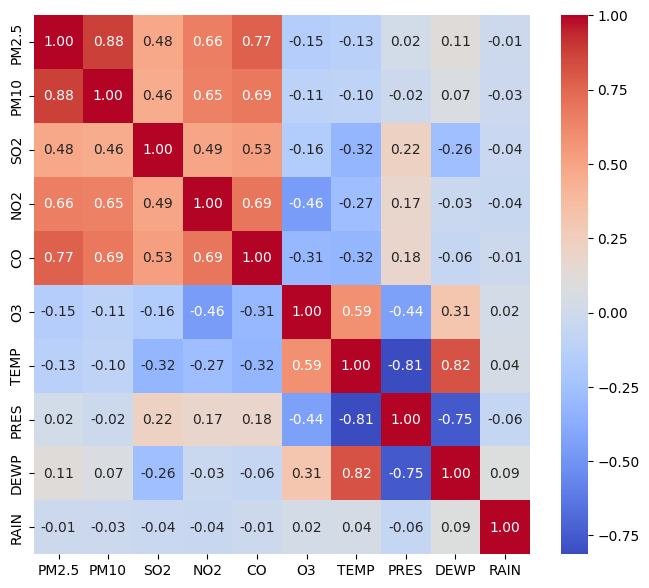

In [31]:
plt.figure(figsize=(8, 7))

sns.heatmap(korelasi, annot=True, fmt='.2f', cmap='coolwarm')

Pada heatmap di atas, relasi antara lapisan ozon atau O3 dengan komponen polutan merupakan relasi yang bernilai negatif atau berkebalikan. Variable hujan juga berkorelasi terbalik dengan komponen-komponen polutan

In [39]:
# Specify the path where to save the CSV file
output_csv_path = "/content/drive/MyDrive/dataset/concated_df.csv"

# Save the combined DataFrame to a CSV file
concated_df.to_csv(output_csv_path, index=False)

In [ ]:
output_csv_path = "/content/drive/MyDrive/dataset/categoric_combined_df.csv"

# Save the combined DataFrame to a CSV file
concated_df_copy.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana Perubahan Kualitas Udara pada Masing-Masing Station?

In [32]:
count_of_category = pd.crosstab(concated_df['station'], concated_df['Category'])
count_of_category.head(12)

Category,Good,Hazardous,Moderate,Unhealthy,Unhealthy for Sensitive Group,Very Unhealthy
station,,,,,,
Aotizhongxin,1505,2859,6372,11857,4817,7654
Changping,2220,2216,7893,10798,5163,6774
Dingling,1686,2264,7034,11149,6129,6802
Dongsi,1899,2891,6161,11762,4481,7870
Guanyuan,1925,2756,6463,11626,4658,7636
Gucheng,1306,2874,5815,12252,5091,7726
Huairou,2031,2113,7354,11469,5611,6486
Nongzhanguan,1706,3272,6057,11458,4668,7903
Shunyi,1895,2591,6855,11685,5202,6836


### Menggunakan Time Series Analysis untuk melihat perubahan kualitas udara dari tahun 2013 sampai tahun 2017

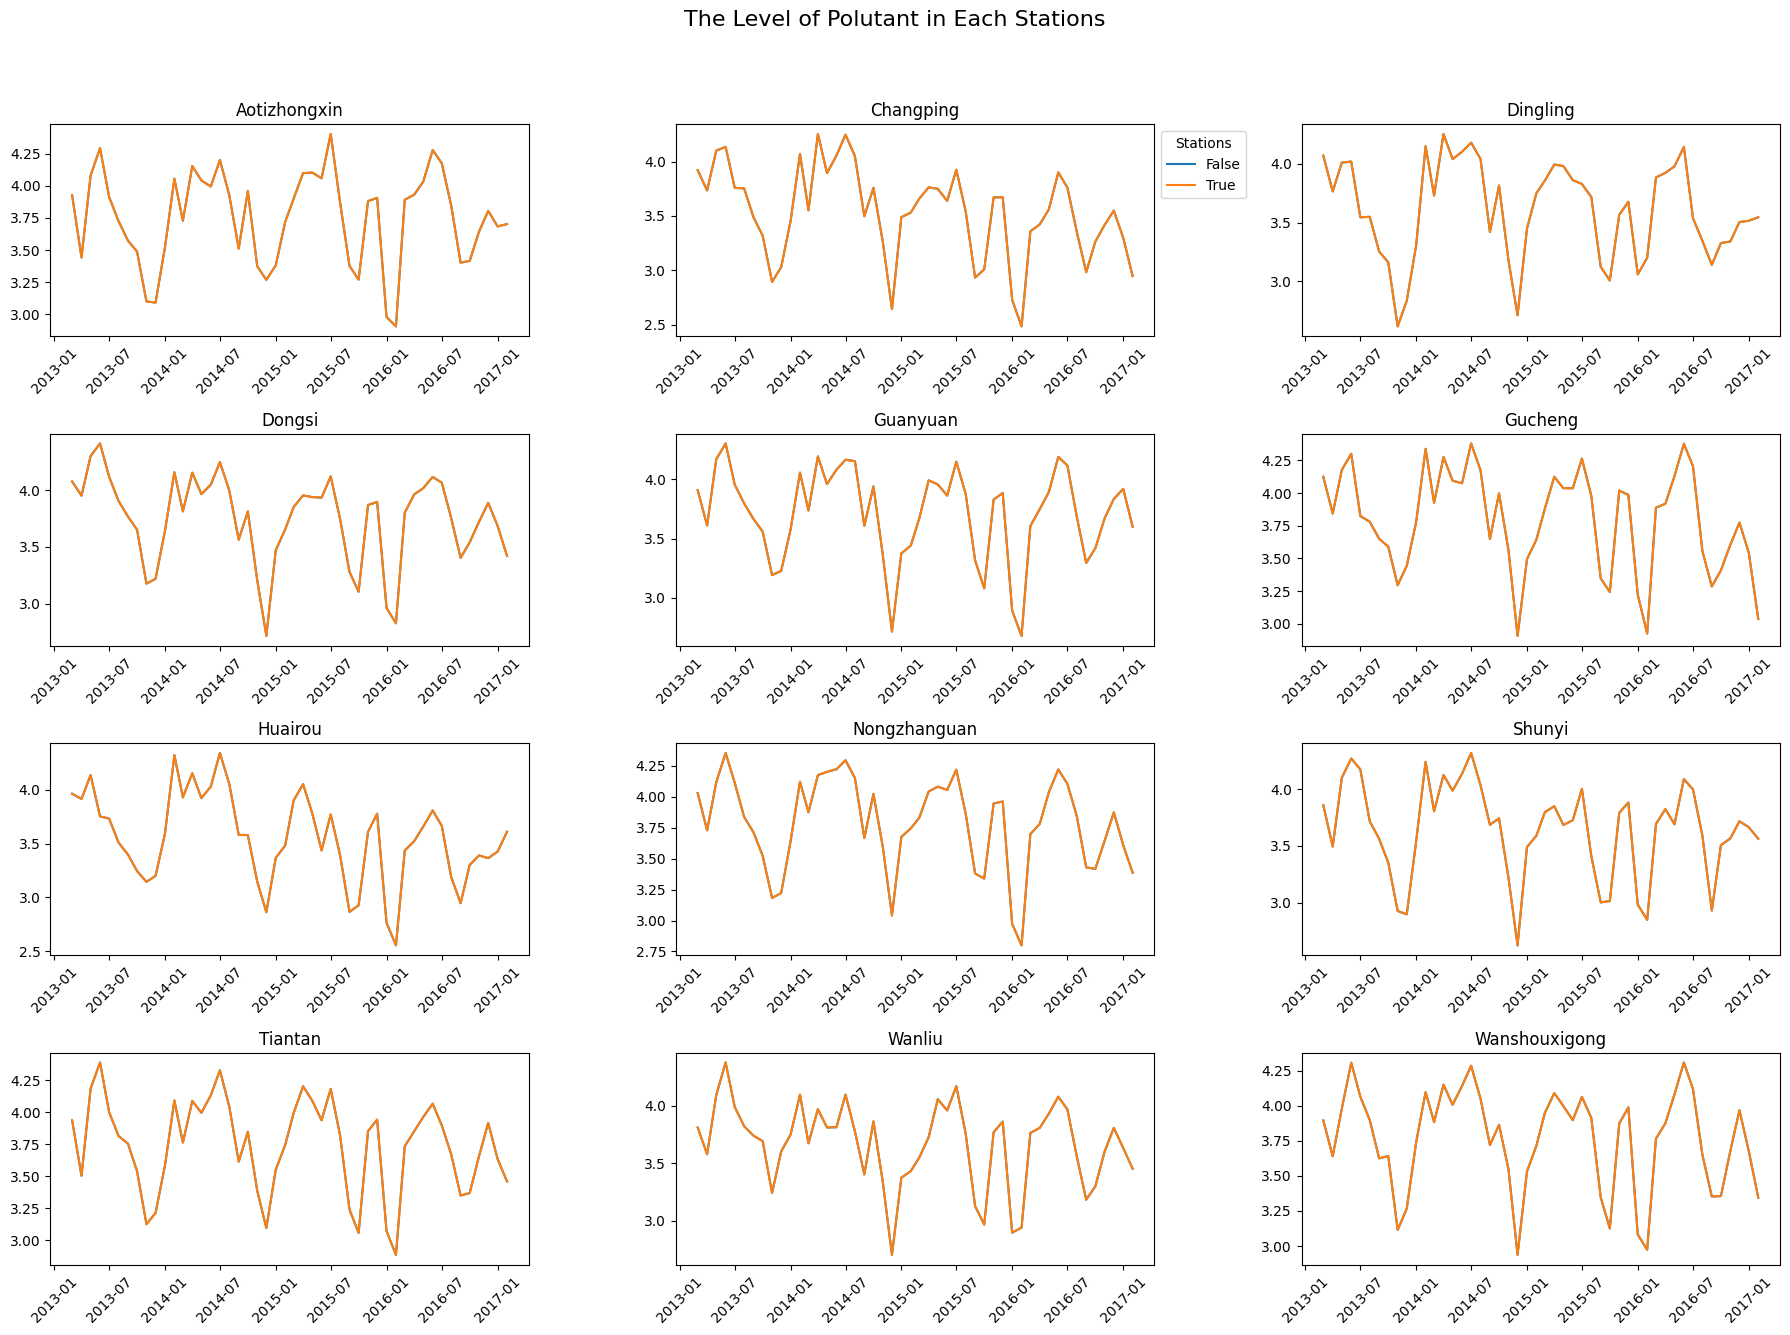

In [34]:
legend_handles = []
stations = ['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan', 'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan', 'Wanliu', 'Wanshouxigong']
fig, axes = plt.subplots(4, 3, figsize=(18, 14))

plt.suptitle('The Level of Polutant in Each Stations', fontsize=16)

# Loop through the parameters and create subplots
for i, station in enumerate(stations):
    row = i // 3  # Row index (0, 0, 1, 1, 2, 2)
    col = i % 3   # Column index (0, 1, 0, 1, 0, 1)

    # Group data by month and station, then plot the distribution of the parameter for each station
    grouped_data = concated_df_copy.groupby([concated_df_copy['datetime'].dt.to_period("M"), concated_df_copy['station'] == station])['Category'].mean().unstack()
    #print(grouped_data)
    monthly_index = grouped_data.index.to_timestamp()  # Convert the index to a datetime series

    for station in grouped_data.columns:
        line, = axes[row, col].plot(monthly_index, grouped_data[True], linestyle='-', label=station)
        if row == 0 and col == 0:
            legend_handles.append(line)

    axes[row, col].set_title(stations[i])
    axes[row, col].tick_params(axis='x', rotation=45)

    # Create a single legend outside of the subplots
    if row == 0 and col == 1:
        axes[row, col].legend(handles=legend_handles, loc='best', bbox_to_anchor=(1, 1), title='Stations')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the subplots
plt.show()

Pada plot di atas, dapat dilihat perubahan kualitas udara dari masing masing station dari waktu ke waktu. Pada waktu terakhir, kualitas udara di station Gucheng menjadi yang paling baik diantara yang lainnya.
Jika dilihat dari keterangan waktu, polusi meningkat pada pertengahan tahun seperti pada bulan Juli.

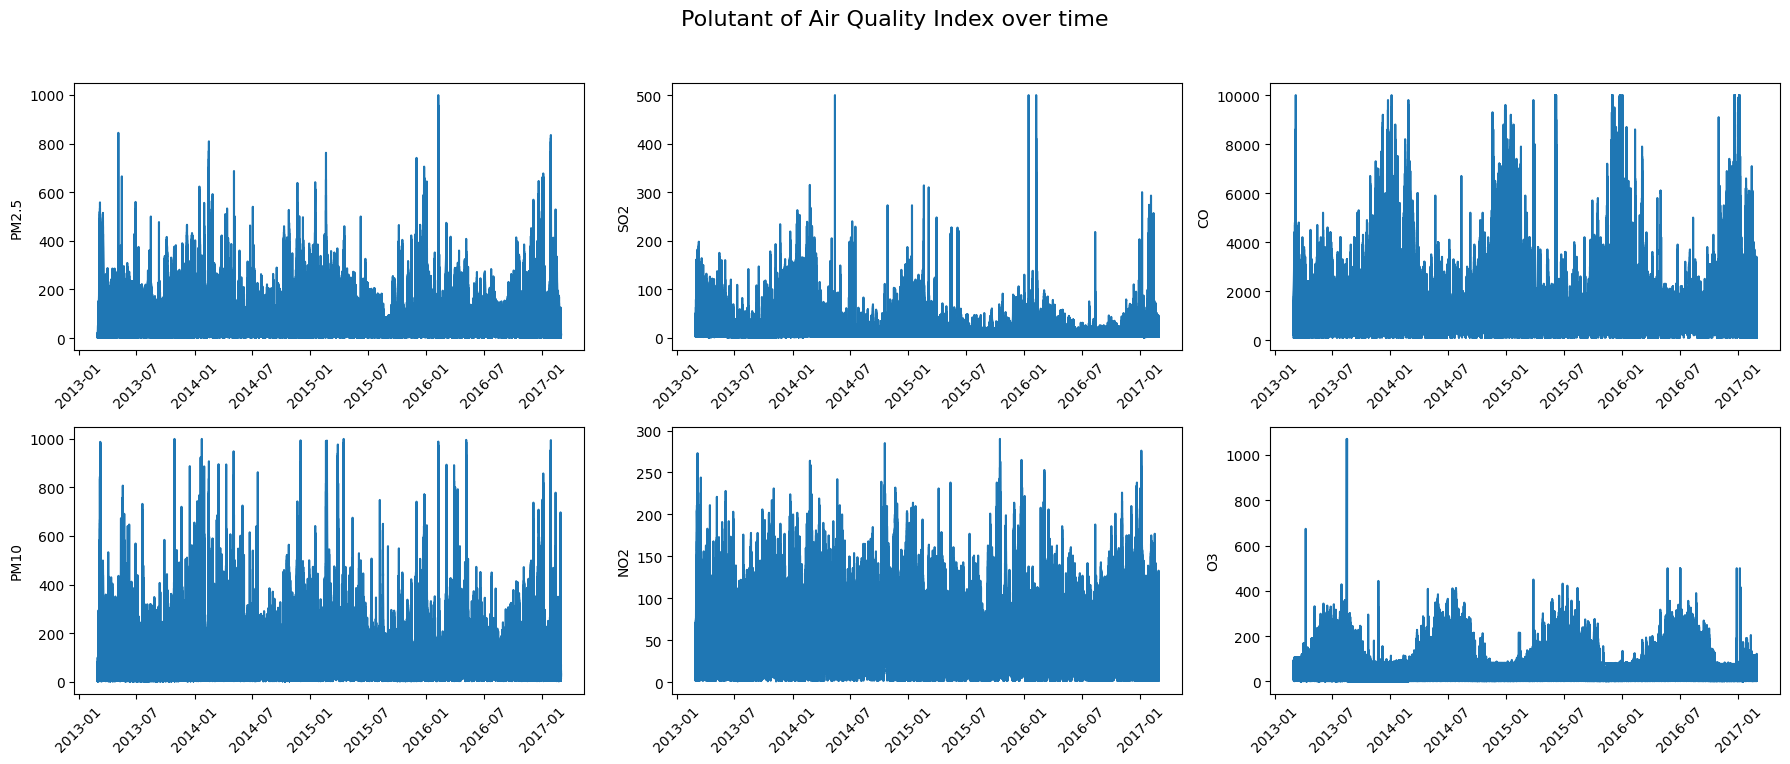

In [35]:
# Creating a plot for each polutant
figur, axes = plt.subplots(2, 3, figsize=(18,8))
figur.suptitle('Polutant of Air Quality Index over time', fontsize=16)

factors = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
for n, factor in enumerate(factors):
  row = n%2
  col = n//2
  axes[row, col].plot(concated_df['datetime'], concated_df[factor], linestyle='-')
  axes[row, col].tick_params(axis='x', rotation=45)
  axes[row, col].set_ylabel(factor)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Pertanyaan 2: Bagaimana Persentase Udara dalam tiap *Station*

In [37]:
category_percentage = {}
for station in concated_df.station.unique():
  count = (concated_df[concated_df['station'] == station]
           .Category
           .value_counts())
  sum = (concated_df[concated_df['station'] == station]
         .Category
         .value_counts()
         .sum())

  percen = count/sum * 100
  category_percentage[station] = percen.reset_index().rename(columns={'Category':'Percen', 'index':'Category'})

#category_percentage['Aotizhongxin']['Percen']

#category_percentage['Aotizhongxin']

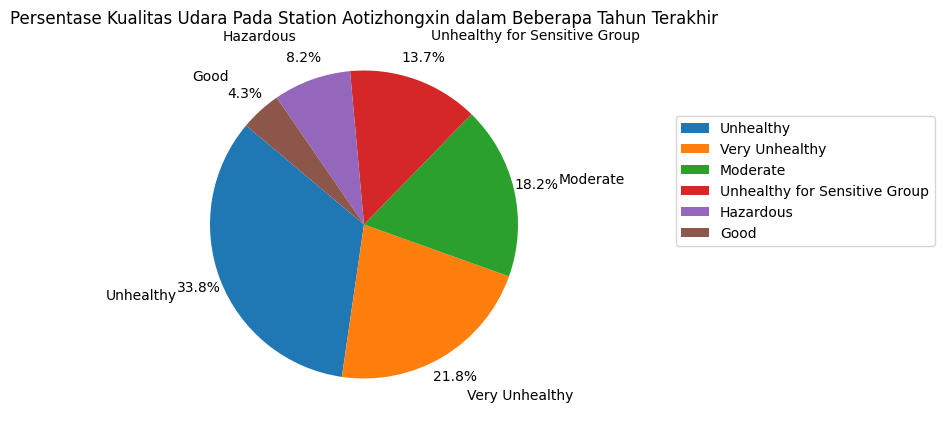

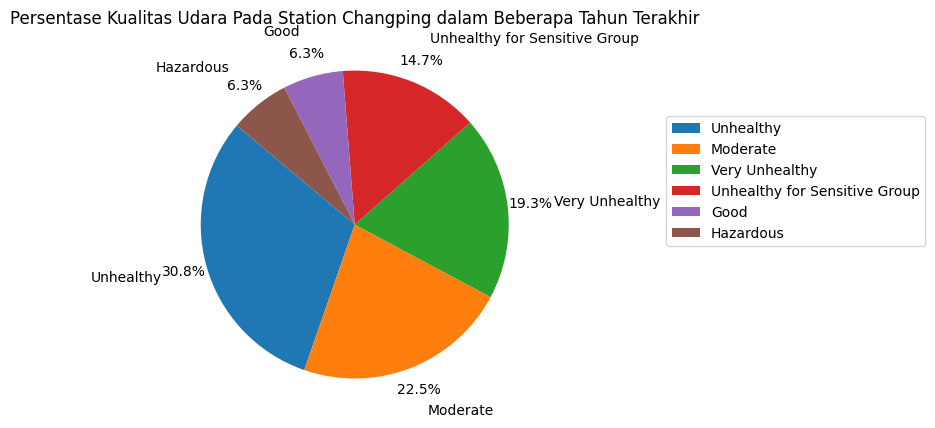

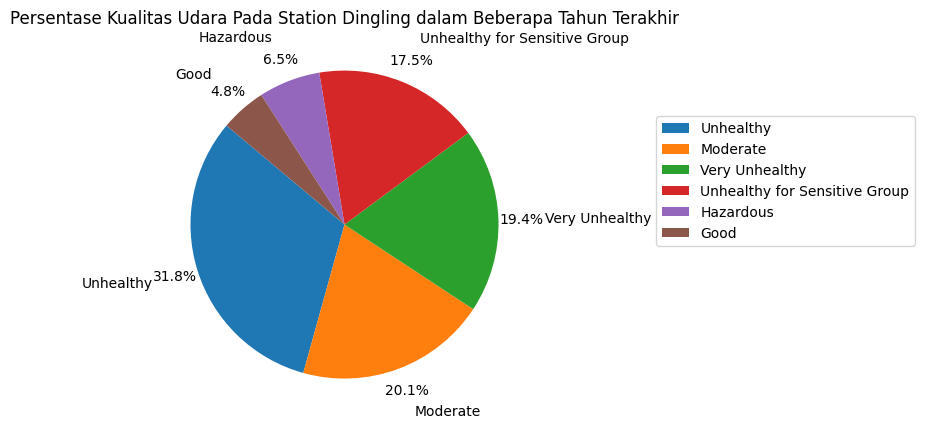

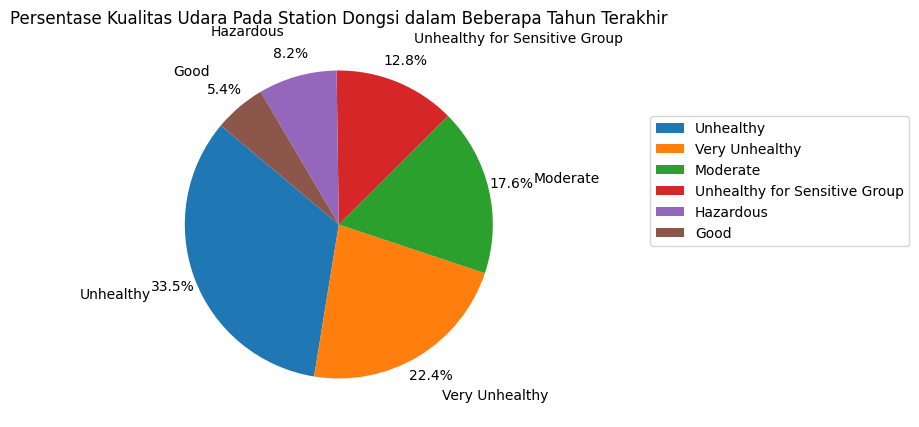

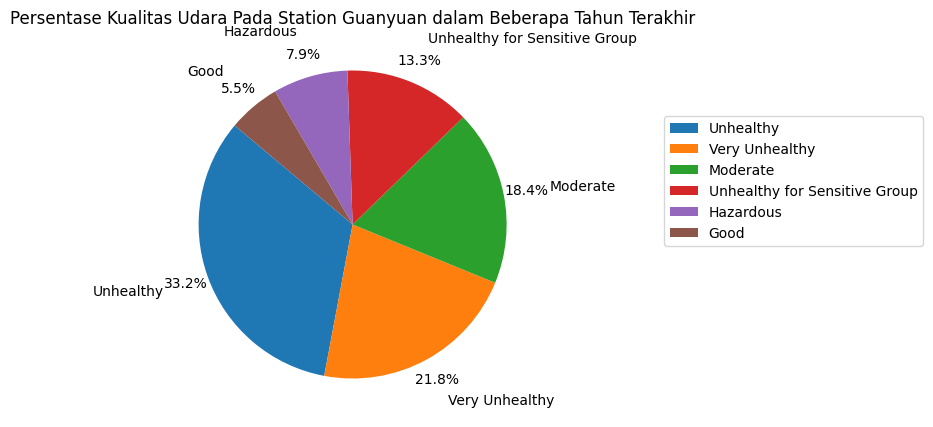

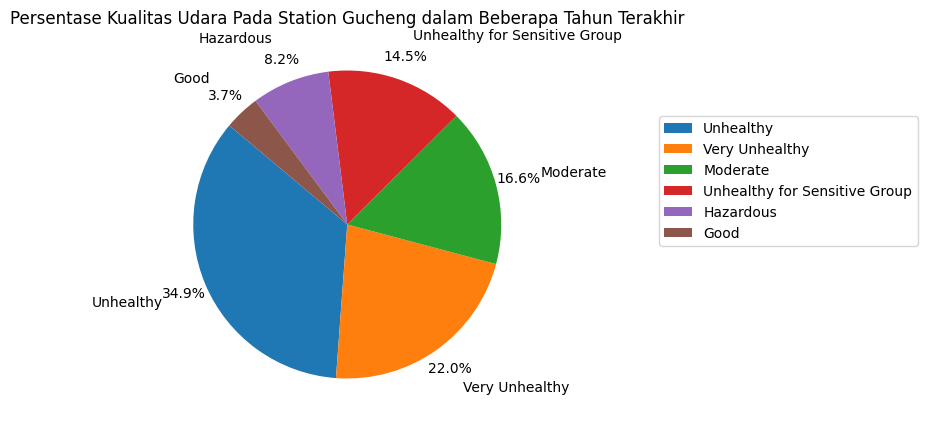

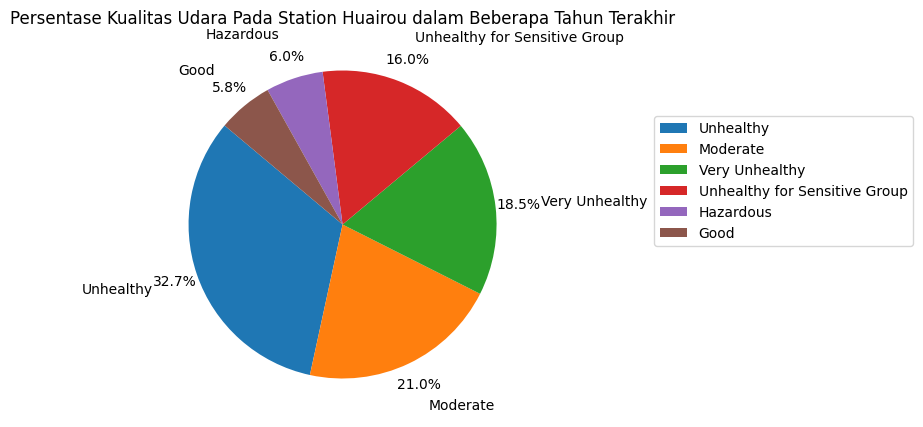

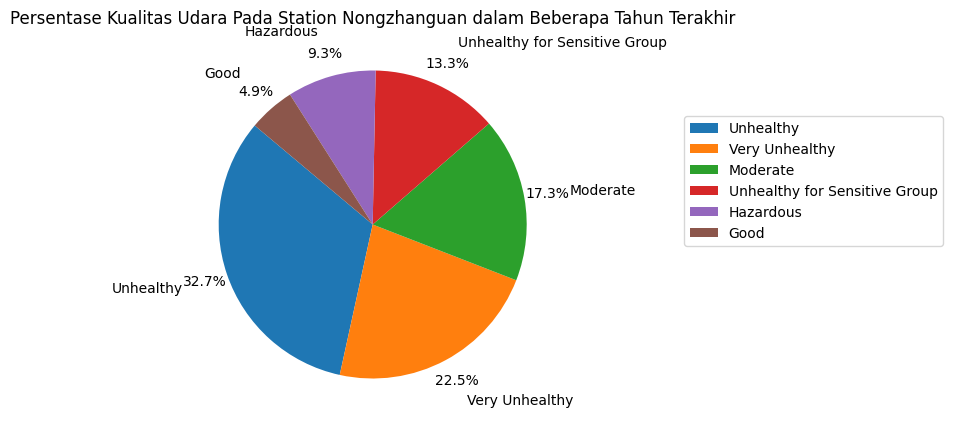

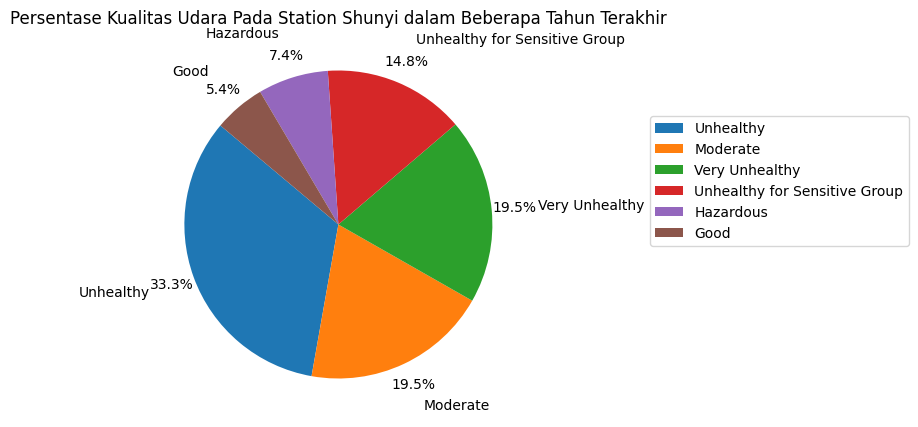

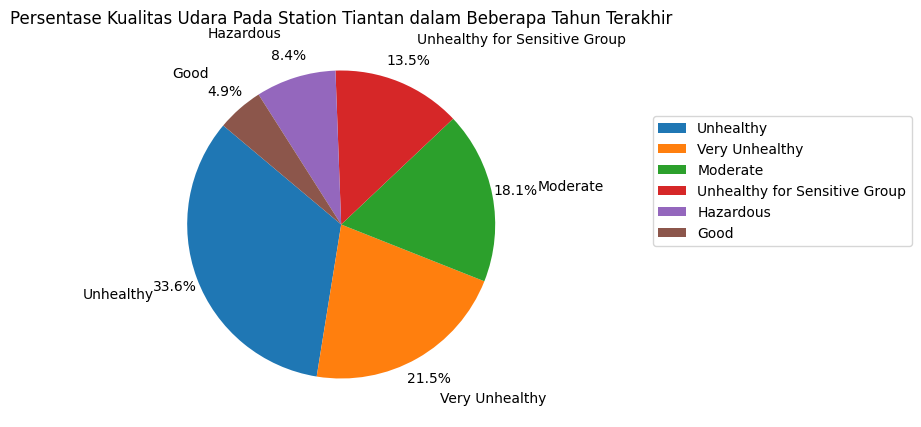

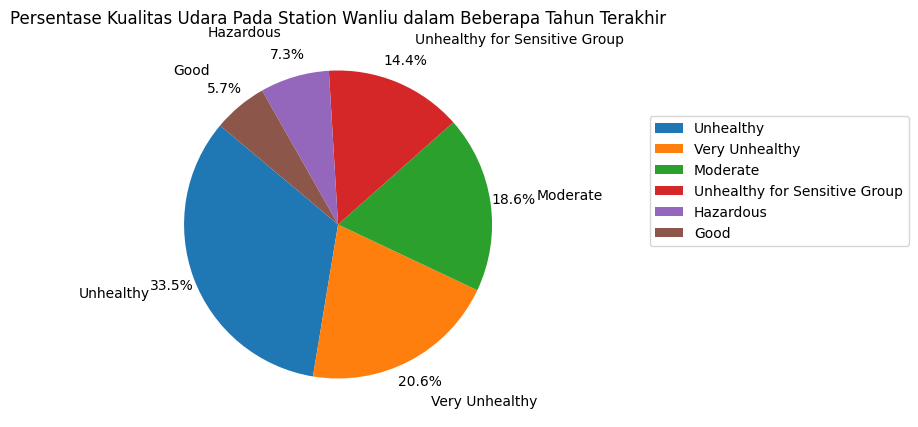

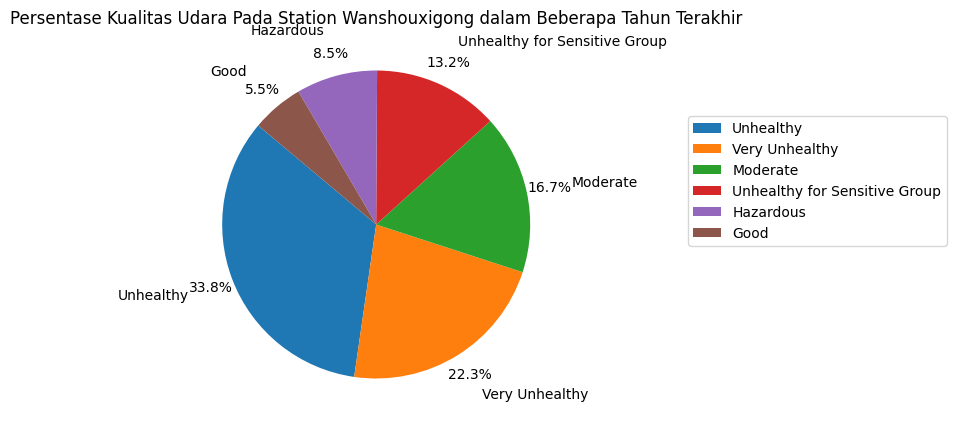

In [40]:
# Create a figure and 12 subplots

# Flatten the axs array to make it easier to iterate over
#axes = axes.flatten()

# Loop through each subplot and create a pie chart
for station in concated_df.station.unique():
  plt.figure(figsize=(5,5))
    #row = i%3
    #col = i//3
  axs=plt.pie(category_percentage[station]['Percen'],
               labels=category_percentage[station]['Category'],
               autopct='%1.1f%%',
               pctdistance=1.15,
               labeldistance=1.3,
               startangle=140)
  plt.title(f'Persentase Kualitas Udara Pada Station {station} dalam Beberapa Tahun Terakhir')
  plt.legend(category_percentage[station]["Category"], bbox_to_anchor=(2,0.8), loc="upper right")



Dapat dilihat dari pie chart di atas, keadaan udara dalam masing masing station didominasi dengan kategori Unhealthy, yang berarti cukup tidak sehat bagi para penduduk.

## Conclusion

- Conclution pertanyaan 1: Dari grafik yang telah tampil, kualitas udara cenderung memburuk pada pertengahan tahun, misal: bulan Juli. Hal itu disebabkan oleh musim panas pada bulan Juli yang diperkuat dengan penggunaan kendaraan yang cukup banyak. Jika dilihat dari rata - rata polutan, CO dan NO2 mendominasi grafik kualitas udara sehingga grafik ozon terlihat kecil.
- Conclution pertanyaan 2: Dari pie chart yang telah ditampilkan, kategori kualitas udara yang mendominasi pie chart tersebut ialah kategori *Unhealthy*. Berkaca dari grafik pada pertanyaan pertama, kualitas Unhealthy disebabkan oleh tingginya tingkat polusi udara. Apalagi, jika diurutkan kategori terbesar kedua adalah *Very Unhealthy* sehingga dapat mengancam kesehatan masyarakat.